### KONVERSI SISCER (Mahasiswa mampu mejelaskan tentang Logika Fuzzy, serta memahami macam-macam algoritma fuzzy dan contoh implementasinya.)

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

# Function Description for Genetic Algorithm
1. initilization_of_population():
Untuk menginisialisasi populasi secara acak.

2. fitness_score():
Mengembalikan orang tua terbaik beserta skornya.

3. selection():
Seleksi dari orang tua terbaik.

4. crossover():
Mengambil setengah dari orang tua pertama dan setengah dari orang tua kedua.

5. mutation():
Secara acak membalik bit yang dipilih dari anak hasil persilangan.

6. generations():
Menjalankan semua fungsi di atas untuk jumlah generasi yang ditentukan.

In [2]:
def initilization_of_population(size,n_feat):
    population = []                              
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

# Implementation of Genetic Algorithm for Feature Selection
Pertama, kita menjalankan fungsi untuk menginisialisasi populasi secara acak.

Populasi yang diacak kemudian dijalankan melalui fungsi kebugaran, yang mengembalikan orang tua terbaik (dengan akurasi tertinggi).

Seleksi dari orang tua terbaik ini akan terjadi tergantung pada parameter n-parent.

Setelah melakukan hal yang sama, ini akan dijalankan melalui fungsi persilangan dan mutasi secara berturut-turut.

Persilangan dibuat dengan menggabungkan gen dari dua orang tua paling bugar dengan memilih bagian dari orang tua pertama dan bagian dari orang tua kedua secara acak.

Mutasi dicapai dengan membalikkan bit yang dipilih secara acak untuk anak hasil persilangan.

Generasi baru diciptakan dengan memilih orang tua paling bugar dari generasi sebelumnya dan menerapkan persilangan dan mutasi.

Proses ini diulang untuk n jumlah generasi.

# PCOS Dataset

# Introduction
**Polycystic ovary syndrome is a disorder involving infrequent, irregular or prolonged menstrual periods, and often excess male hormone (androgen) levels. The ovaries develop numerous small collections of fluid — called follicles — and may fail to regularly release eggs
dataset contains all physical and clinical parameters to determine PCOS and infertility related issues .**

# Loading the Dataset:

In [5]:
data_pcos = pd.read_csv("./dataset/PCOS_data.csv")
label_pcos = data_pcos["PCOS (Y/N)"]
data_pcos.drop(["Sl. No","Patient File No.","PCOS (Y/N)","Unnamed: 44","II    beta-HCG(mIU/mL)","AMH(ng/mL)"],axis = 1,inplace = True)
data_pcos["Marraige Status (Yrs)"].fillna(data_pcos['Marraige Status (Yrs)'].describe().loc[['50%']][0], inplace = True) 
data_pcos["Fast food (Y/N)"].fillna(1, inplace = True) 

print("PCOS dataset:\n",data_pcos.shape[0],"Records\n",data_pcos.shape[1],"Features")

PCOS dataset:
 541 Records
 39 Features


In [6]:
display(data_pcos.head())
print("The features in this dataset have both discrete and continuous values")

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


The features in this dataset have both discrete and continuous values


**Checking Accuracy**

In [7]:
score = acc_score(data_pcos,label_pcos)
score

,Classifier,Accuracy
0,RandomForest,0.889706
1,AdaBoost,0.860294
2,GradientBoosting,0.860294
3,LinearSVM,0.852941
4,Logistic,0.838235
5,DecisionTree,0.838235
6,RadialSVM,0.698529
7,KNeighbors,0.676471


In [8]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_pcos,label_pcos)
chromo_df_pcos,score_pcos=generations(data_pcos,label_pcos,size=80,n_feat=data_pcos.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.9117647058823529]
Best score in generation 2 : [0.9191176470588235]
Best score in generation 3 : [0.9044117647058824]
Best score in generation 4 : [0.9117647058823529]
Best score in generation 5 : [0.9117647058823529]


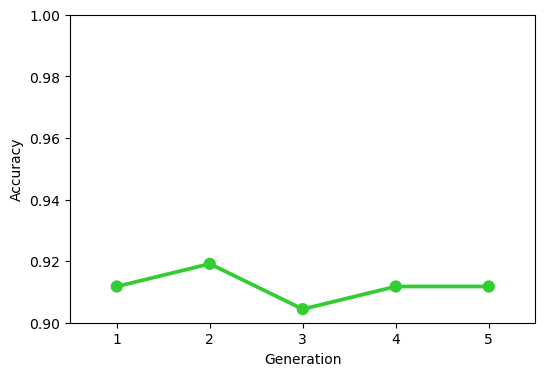

In [9]:
plot(score_pcos,0.9,1.0,c = "limegreen")